In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
high_img = np.load('/content/drive/MyDrive/Model/high_img_5K.npy')
low_img = np.load('/content/drive/MyDrive/Model/low_img_5K.npy')

In [ ]:
import os
import re
from scipy import ndimage, misc
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.13.0


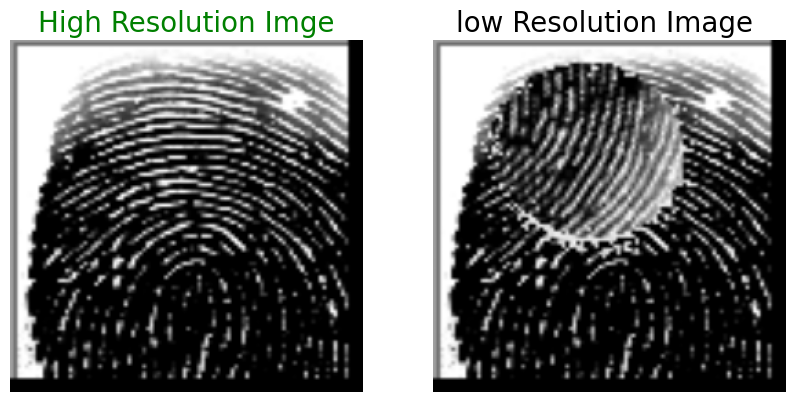

In [ ]:
for i in range(1):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [ ]:
SIZE=256
train_high_image = high_img[0:4500]
train_low_image = low_img[0:4500]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[4500:4750]
validation_low_image =  low_img[4500:4750]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[4750:]
test_low_image = low_img[4750:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (4500, 256, 256, 3)
Shape of test images: (250, 256, 256, 3)
Shape of validation images: (250, 256, 256, 3)


In [ ]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
def build_vdsr():
    input_img = Input(shape=(None, None, 3))  # Input shape can vary

    # First convolutional layer
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_img)

    # Intermediate convolutional layers
    for _ in range(18):
        x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)

    # Last convolutional layer
    x = Conv2D(1, (3, 3), padding='same')(x)

    # Adding the input to the output of the last convolutional layer
    output_img = Add()([input_img, x])

    newVDSRmodel = Model(input_img, output_img)
    return newVDSRmodel

In [ ]:
import math
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.1
   epochs_drop = 20.0
   lrate = initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
   print(lrate)
   return lrate


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='PSNR',
    patience=8,
    restore_best_weights=True
)

In [ ]:
# Define the loss function (mean squared error)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Load your training data and preprocess it (e.g., high-resolution and low-resolution image pairs)

# Split your data into training and validation sets

# Create the VDSR model
newVDSRmodel = build_vdsr()

# Define the optimizer (e.g., Adam) and compile the model
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)
#optimizer = Adam()
newVDSRmodel.compile(optimizer=tf.keras.optimizers.SGD(1e-8, momentum=0.9), loss=mse_loss, metrics=[PSNR])

x_train, y_train =  train_low_image, train_high_image

# Train the model
#model.fit(x=x_train, y=y_train, validation_data=(val_input_images, val_output_images), epochs=100, batch_size=1)
newVDSRmodel.fit(x=x_train, y=y_train, callbacks=[early_stop], epochs=100, batch_size=1)

Epoch 1/100
4500/4500 [==============================] - 345s 74ms/step - loss: 0.0161 - PSNR: 19.2160
Epoch 2/100
4500/4500 [==============================] - 335s 74ms/step - loss: 0.0161 - PSNR: 19.2162
Epoch 3/100
4500/4500 [==============================] - 335s 74ms/step - loss: 0.0161 - PSNR: 19.2163
Epoch 4/100
4500/4500 [==============================] - 336s 75ms/step - loss: 0.0161 - PSNR: 19.2165
Epoch 5/100
4500/4500 [==============================] - 335s 74ms/step - loss: 0.0161 - PSNR: 19.2167
Epoch 6/100
4500/4500 [==============================] - 335s 74ms/step - loss: 0.0161 - PSNR: 19.2169
Epoch 7/100
4500/4500 [==============================] - 335s 74ms/step - loss: 0.0161 - PSNR: 19.2170
Epoch 8/100
4500/4500 [==============================] - 336s 75ms/step - loss: 0.0161 - PSNR: 19.2172
Epoch 9/100
4500/4500 [==============================] - 336s 75ms/step - loss: 0.0161 - PSNR: 19.2174


In [ ]:
newVDSRmodel.save('/content/drive/MyDrive/Model/VDSR_5K_new_2_oct.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
newVDSRmodel.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_40 (Conv2D)          (None, None, None, 64)       1792      ['input_3[0][0]']             
                                                                                                  
 conv2d_41 (Conv2D)          (None, None, None, 64)       36928     ['conv2d_40[0][0]']           
                                                                                                  
 conv2d_42 (Conv2D)          (None, None, None, 64)       36928     ['conv2d_41[0][0]']           
                                                                                            

In [ ]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted,cmap='gray')

    plt.show()

In [ ]:
for i in range(27):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    resized_image = tf.image.resize(input_image, (SIZE, SIZE))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(newVDSRmodel.predict(resized_image), 0.0, 1.0)
    print(predicted.shape)
    predicted = np.reshape(predicted, (256, 256, 3))
    #predicted = np.squeeze(predicted, axis=0)
    print(predicted.shape)
    plot_images(test_high_image[i], test_low_image[i], predicted)
    print('PSNR', PSNR(test_high_image[i], predicted), 'dB')
    #print('SSIM', tf.image.ssim(tf.convert_to_tensor(test_high_image[i]), tf.convert_to_tensor(predicted), max_val=1))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from skimage.metrics import structural_similarity as ssim
def evaluate_similarity(original_images, resized_images):
    original_gray = cv2.cvtColor(original_images, cv2.COLOR_BGR2GRAY)
    resized_gray = cv2.cvtColor(resized_images, cv2.COLOR_BGR2GRAY)
    similarity = ssim(original_gray, resized_gray)
    return similarity

In [ ]:
PSNR_values=[]
Similarities=[]
for i in range(27):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    resized_image = tf.image.resize(input_image, (SIZE, SIZE))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(newVDSRmodel.predict(resized_image), 0.0, 1.0)

    predicted = np.reshape(predicted, (256, 256, 3))

    PSNR_values.append(PSNR(test_high_image[i], predicted))
    Similarities.append(evaluate_similarity(test_high_image[i], predicted))
avg_psnr= np.mean(PSNR_values)
avg_ssim=np.mean(Similarities)

print(f"Average PSNR:{avg_psnr}")
print(f"Average SSIM:{avg_ssim}")
    #print('SSIM', tf.image.ssim(tf.convert_to_tensor(test_high_image[i]), tf.convert_to_tensor(predicted), max_val=1))

1/1 [==============================] - 0s 19ms/step
Average PSNR:18.922603607177734
Average SSIM:0.8819776724501687
